<a href="https://colab.research.google.com/github/aryab04/Classification_models/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [321]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [322]:
print(df.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [323]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [324]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Data imputation of 0's in every feature

In [325]:
df.shape

(768, 9)

Correlation Matrix and Heat Map

In [326]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


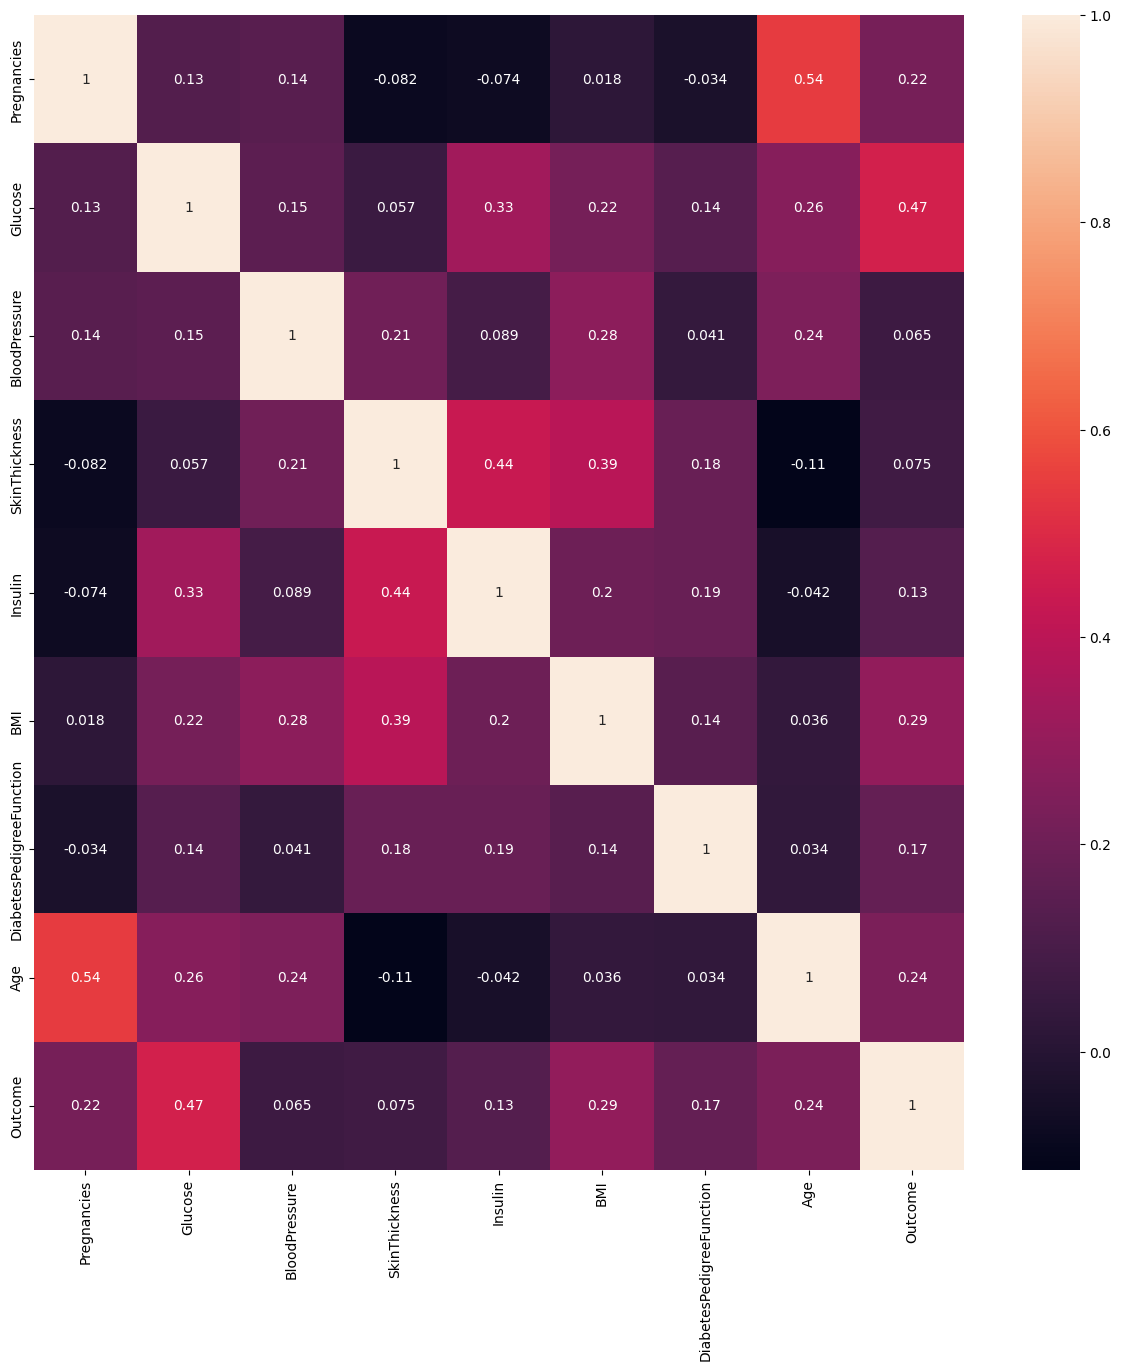

In [327]:
plt.figure(figsize=(15,15))
ax=sns.heatmap(df.corr(),annot=True)
plt.savefig('heatmap.png')
plt.show()

In [328]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-329-c8d44319cfd7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Pregnancies)


<Axes: xlabel='Pregnancies', ylabel='Density'>

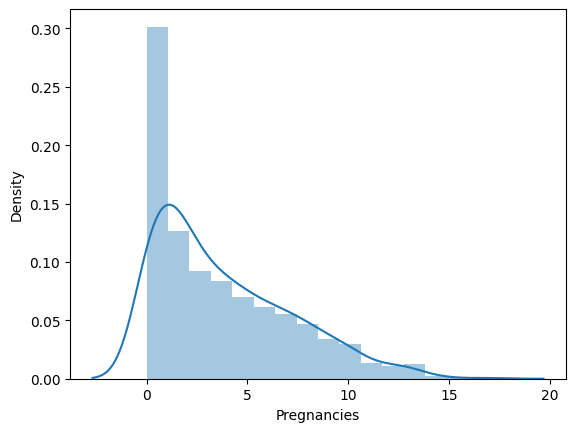

In [329]:
# Pregnancies -> Median
# Right skewed
sns.distplot(df.Pregnancies)

<ipython-input-330-2c0772806c51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

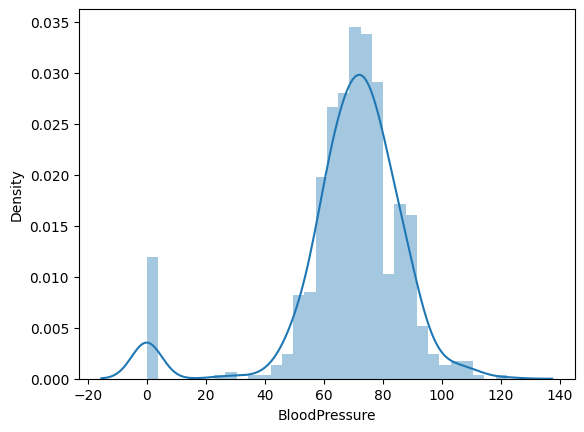

In [330]:
# BP -> Mean
# Symmetric
sns.distplot(df['BloodPressure'])

<ipython-input-331-15eea5f20633>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Insulin)


<Axes: xlabel='Insulin', ylabel='Density'>

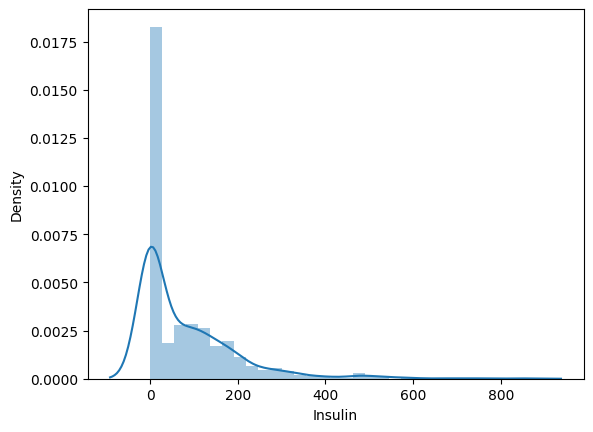

In [331]:
# Insulin -> Median
# Right-skewed
sns.distplot(df.Insulin)

In [332]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [333]:
# Replacing the '0's -> Data Imputation

df.Pregnancies=df.Pregnancies.replace(0,df.Pregnancies.median())
df.Glucose=df.Glucose.replace(0,df.Glucose.mean())
df.BloodPressure=df.BloodPressure.replace(0,df.BloodPressure.mean())
df.SkinThickness=df.SkinThickness.replace(0,df.SkinThickness.median())
df.Insulin=df.Insulin.replace(0,df.Insulin.median())
df.BMI=df.BMI.replace(0,df.BMI.mean())
df.DiabetesPedigreeFunction=df.DiabetesPedigreeFunction.replace(0,df.DiabetesPedigreeFunction.median())
df.Age=df.Age.replace(0,df.Age.median())


In [334]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1


In [335]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# x=df.drop[columns="Outcome",axis=1]
# y=df.Outcome

In [336]:
type(x)

pandas.core.frame.DataFrame

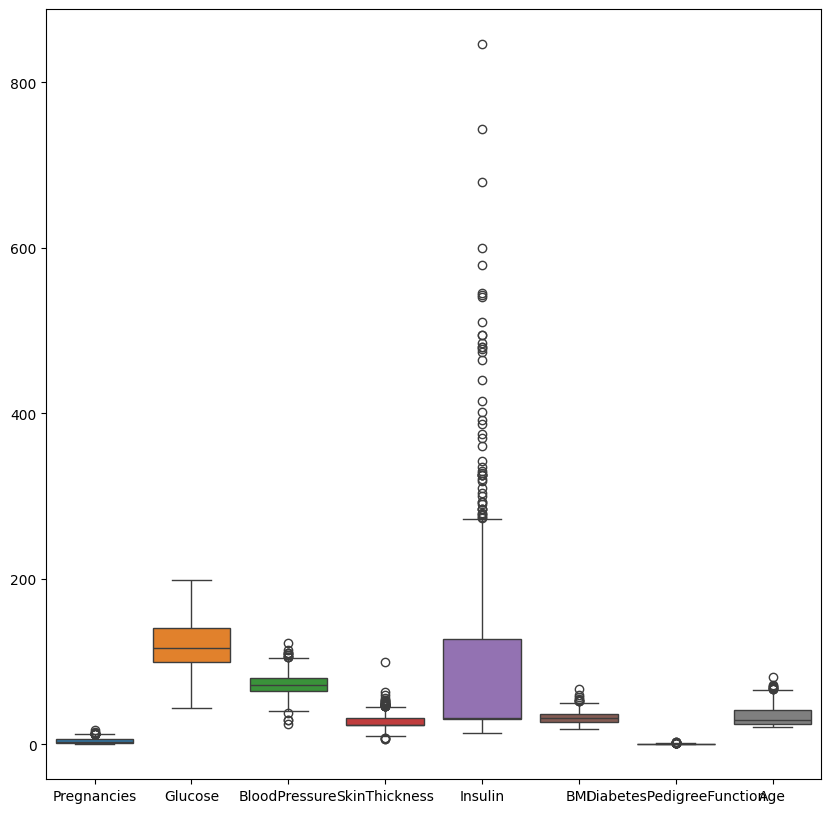

In [337]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=x, ax=ax)
plt.savefig('boxplot.png')

In [338]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [339]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in cols:

  Q1=x[col].quantile(0.25)
  Q3=x[col].quantile(0.75)
  IQR=Q3-Q1

  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR

  mask=( x[col]>=lower_limit) & (x[col]<=upper_limit)


In [340]:
# After removing outliers
x=x[mask]
y=y[mask]

In [341]:
x.shape,y.shape

((759, 8), (759,))

In [342]:
type(x)

pandas.core.frame.DataFrame

In [343]:
numbern_of_outliers=df.shape[0]-x.shape[0]
numbern_of_outliers

9

Standardization

In [344]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=scaler.fit_transform(x)

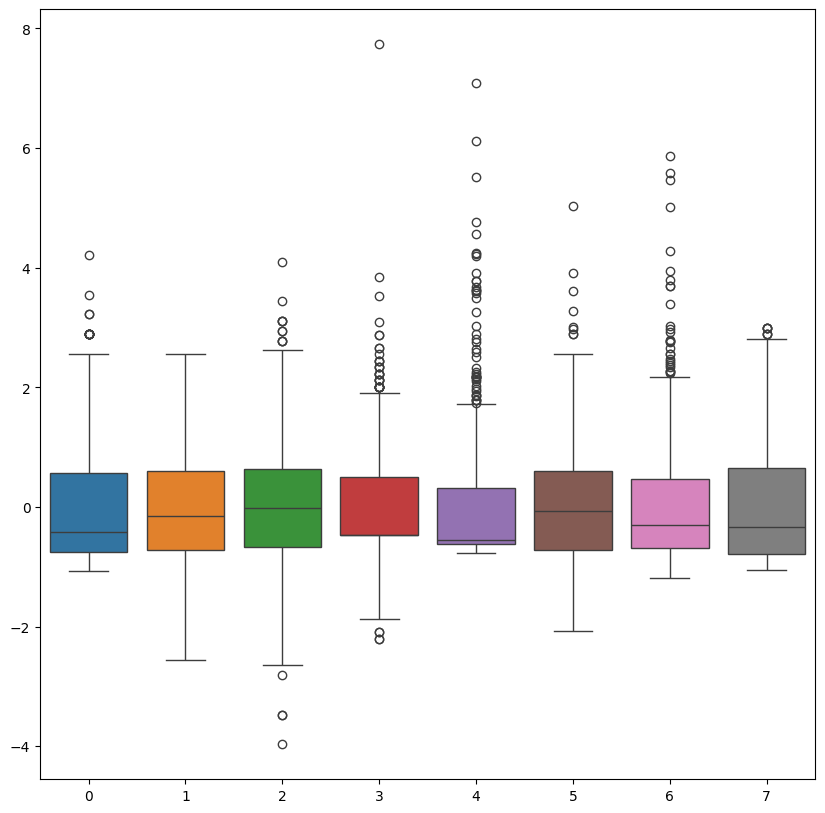

In [345]:
fig,ax =plt.subplots(figsize=(10,10))
sns.boxplot(data=x,ax=ax)
plt.savefig('boxplot_after_standardization.png')

In [346]:
x,y

(array([[ 0.57322173,  0.87008298, -0.01698412, ...,  0.16090077,
          0.46879263,  1.54828125],
        [-1.0797999 , -1.20656984, -0.51093456, ..., -0.85816238,
         -0.36177415, -0.16252742],
        [ 1.23443039,  2.02377899, -0.6755847 , ..., -1.33857787,
          0.60421113, -0.07248486],
        ...,
        [ 0.2426174 , -0.01991109, -0.01698412, ..., -0.91639456,
         -0.68075995, -0.25256998],
        [-1.0797999 ,  0.14490263, -1.00488499, ..., -0.3486308 ,
         -0.36779275,  1.27815356],
        [-1.0797999 , -0.9428679 , -0.18163427, ..., -0.30495667,
         -0.47010895, -0.88286791]]),
 0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 759, dtype: int64)

In [347]:
y.value_counts()

,count
Outcome,
0,493
1,266


In [348]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [349]:
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [350]:
x=pd.DataFrame(data=x,columns=cols)
y=pd.DataFrame(data=y,columns=['Outcome'])
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [351]:
y.shape

(759, 1)

In [352]:
x.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)

In [353]:
# Further removal of outliers

q = x['Insulin'].quantile(0.95)
mask= x['Insulin']<q
x = x[mask]
y = y[mask]


In [358]:
x.shape,y.shape

((721, 8), (721, 1))

In [360]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [361]:
x_train.shape

(483, 8)

In [362]:
x_test.shape

(238, 8)

In [363]:
# Data Imbalancing

y_train.value_counts()

,count
Outcome,
0,318
1,165


In [371]:
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

SMOTE Technique

In [369]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)

In [370]:
y_train.value_counts()

,count
Outcome,
0,318
1,318


In [372]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [376]:
y_pred=model.predict(x_test)
print(y_pred)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


In [377]:
from sklearn.metrics import accuracy_score

In [378]:
accuracy_score(y_test,y_pred)

0.7478991596638656

In [382]:
from sklearn.metrics import classification_report
target_names=['Non-Diabetic','Diabetic']
print(classification_report(y_test,y_pred,target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



In [384]:
import pickle
pickle.dump(model,open("classification.pkl","wb"))

In [386]:
model=pickle.load(open("classification.pkl","rb"))
model.predict(x_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])